In [2]:
## Import required libraries

## for data
import numpy as np
import pandas as pd

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for processing
import nltk
import re
import ftfy
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

## WordCloud - Python linrary for creating image wordclouds
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\otaku7\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\otaku7\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\otaku7\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\otaku7\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
dep_tweets_df = pd.read_csv(r"C:\Users\otaku7\Desktop\GP\depression\data\depressive_tweets.csv")
tweets_df = pd.read_csv(r"C:\Users\otaku7\Desktop\GP\depression\data\Sentiment Analysis Dataset 2.csv", 
                               encoding = "ISO-8859-1", usecols = range(0,4), nrows = 40000)

In [4]:
dep_tweets_df

,Unnamed: 0,tweet.id,created_at,text,location,retweet,favorite
0,0,1447537898572574730,2021-10-11 12:21:43,Open discussion. Between the Transfer Portal a...,Cheyenne Wyoming,0,0
1,1,1447540582490988553,2021-10-11 12:32:23,Plenty of things are changing in my life and t...,NaN,0,0
2,2,1447807717859491842,2021-10-12 06:13:53,I feel a little hopeless. Anyone else? #hopele...,NaN,0,0
3,3,1448076026219692033,2021-10-13 00:00:03,"Which is more healthy? Hope, or hopelessness? ...","Denver, CO",0,0
4,4,1448382047375040513,2021-10-13 20:16:04,So someone tell me how do I get over #HOPELESS...,Portland Or .,0,2
...,...,...,...,...,...,...,...
24142,24142,1459521498842992642,2021-11-13 14:00:16,Just got banned from a server F #sad,Jakarta Capital Region,0,1
24143,24143,1459521611997003777,2021-11-13 14:00:43,I literally cried during my exam and the cam i...,بيت أمك,0,0
24144,24144,1459524263946326017,2021-11-13 14:11:15,No one can be happy with a guy like me. That's...,"Varanasi, Uttar Pradesh, India",0,0
24145,24145,1459530315437785095,2021-11-13 14:35:18,arrived at my house but Am I Home? #deep #sad ...,they19sea,1,3


In [5]:
tweets_df

,ï»¿ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...
...,...,...,...,...
39995,40007,0,Sentiment140,"@AndreaKidd Ouchies, I hope it isn't anything ..."
39996,40008,1,Sentiment140,@AndreaKobayashi It's the best cafe in Asakusa...
39997,40009,1,Sentiment140,@AndreaKoeln heeey! tonight is the night! no s...
39998,40010,1,Sentiment140,@AmandaFClark it is when you add the hammock


In [6]:
## select the tweets with sentiment == 1 
new_df = tweets_df[tweets_df.Sentiment == 1]
new_df.reset_index(inplace=True)

In [7]:
new_df.shape

(20952, 5)

In [8]:
new_df

,index,ï»¿ItemID,Sentiment,SentimentSource,SentimentText
0,2,3,1,Sentiment140,omg its already 7:30 :O
1,6,7,1,Sentiment140,Juuuuuuuuuuuuuuuuussssst Chillin!!
2,8,9,1,Sentiment140,handed in my uniform today . i miss you ...
3,9,10,1,Sentiment140,hmmmm.... i wonder how she my number @-)
4,11,12,1,Sentiment140,thanks to all the haters up in my face a...
...,...,...,...,...,...
20947,39992,40004,1,Sentiment140,"@andreaj27 well, cheers. i have a glass of wat..."
20948,39994,40006,1,Sentiment140,@AndreaJo84 Is that right? You're over in Palm...
20949,39996,40008,1,Sentiment140,@AndreaKobayashi It's the best cafe in Asakusa...
20950,39997,40009,1,Sentiment140,@AndreaKoeln heeey! tonight is the night! no s...


## Data Cleaning and Processing:

In [9]:
print(dep_tweets_df.shape)
print(new_df.shape)

(24147, 7)
(20952, 5)


In [10]:
## Check the data type of each column
dep_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24147 entries, 0 to 24146
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  24147 non-null  int64 
 1   tweet.id    24147 non-null  int64 
 2   created_at  24147 non-null  object
 3   text        24147 non-null  object
 4   location    15409 non-null  object
 5   retweet     24147 non-null  int64 
 6   favorite    24147 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 1.3+ MB


In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20952 entries, 0 to 20951
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            20952 non-null  int64 
 1   ï»¿ItemID        20952 non-null  int64 
 2   Sentiment        20952 non-null  int64 
 3   SentimentSource  20952 non-null  object
 4   SentimentText    20952 non-null  object
dtypes: int64(3), object(2)
memory usage: 818.6+ KB


In [12]:
# Drop unnecessary columns
dep_tweets_df.drop(columns=['Unnamed: 0'], inplace=True)
new_df.drop(columns=['ï»¿ItemID', 'index','Sentiment', 'SentimentSource'], inplace=True)

C:\Users\otaku7\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
print(dep_tweets_df.shape)
print(new_df.shape)

(24147, 6)
(20952, 1)


In [14]:
new_df

,SentimentText
0,omg its already 7:30 :O
1,Juuuuuuuuuuuuuuuuussssst Chillin!!
2,handed in my uniform today . i miss you ...
3,hmmmm.... i wonder how she my number @-)
4,thanks to all the haters up in my face a...
...,...
20947,"@andreaj27 well, cheers. i have a glass of wat..."
20948,@AndreaJo84 Is that right? You're over in Palm...
20949,@AndreaKobayashi It's the best cafe in Asakusa...
20950,@AndreaKoeln heeey! tonight is the night! no s...


In [17]:
## Finding unique values in each column
dep_tweets_df.nunique()


tweet.id      18190
created_at    18071
text          17107
location       4647
retweet          74
favorite        159
dtype: int64

 we have 18190 unique tweets according to tweet.id, so we need to get rid of the duplicates.

In [18]:
new_df.nunique()

SentimentText    20952
dtype: int64

In [20]:
## drop duplicate values in tweet.id
dep_tweets_df.drop_duplicates(subset=['tweet.id'], inplace=True)

In [21]:
dep_tweets_df.reset_index(inplace=True)

In [22]:
dep_tweets_df.shape

(18190, 7)

In [23]:
dep_tweets_df.isnull().sum()

index            0
tweet.id         0
created_at       0
text             0
location      6384
retweet          0
favorite         0
dtype: int64

location will not be used in our analysis or as a feature in our model, we don't need to replace them.

In [24]:
new_df.isnull().sum()

SentimentText    0
dtype: int64

In [25]:
## Drop all the columns except index, tweet.id and text
new_dep_df = dep_tweets_df[['text']]

In [26]:
## Add label to both datasets (0 is non-depressive and 1 is depressive)
new_dep_df['label'] = pd.Series([1 for x in range(len(new_dep_df.index))])
new_df['label'] = pd.Series([0 for x in range(len(new_df.index))])

C:\Users\otaku7\AppData\Local\Temp/ipykernel_42276/2466168844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dep_df['label'] = pd.Series([1 for x in range(len(new_dep_df.index))])
C:\Users\otaku7\AppData\Local\Temp/ipykernel_42276/2466168844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['label'] = pd.Series([0 for x in range(len(new_df.index))])


In [27]:
new_dep_df

,text,label
0,Open discussion. Between the Transfer Portal a...,1
1,Plenty of things are changing in my life and t...,1
2,I feel a little hopeless. Anyone else? #hopele...,1
3,"Which is more healthy? Hope, or hopelessness? ...",1
4,So someone tell me how do I get over #HOPELESS...,1
...,...,...
18185,Just got banned from a server F #sad,1
18186,I literally cried during my exam and the cam i...,1
18187,No one can be happy with a guy like me. That's...,1
18188,arrived at my house but Am I Home? #deep #sad ...,1


In [29]:
## Change the column name to be aligned with depressive dataset
new_df.rename(columns={'SentimentText': 'text'}, inplace=True)

C:\Users\otaku7\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [31]:
new_df

,text,label
0,omg its already 7:30 :O,0
1,Juuuuuuuuuuuuuuuuussssst Chillin!!,0
2,handed in my uniform today . i miss you ...,0
3,hmmmm.... i wonder how she my number @-),0
4,thanks to all the haters up in my face a...,0
...,...,...
20947,"@andreaj27 well, cheers. i have a glass of wat...",0
20948,@AndreaJo84 Is that right? You're over in Palm...,0
20949,@AndreaKobayashi It's the best cafe in Asakusa...,0
20950,@AndreaKoeln heeey! tonight is the night! no s...,0


In [32]:
## Combine two dataframes together
df_all = pd.concat([new_dep_df, new_df], ignore_index=True)

In [33]:
df_all

,text,label
0,Open discussion. Between the Transfer Portal a...,1
1,Plenty of things are changing in my life and t...,1
2,I feel a little hopeless. Anyone else? #hopele...,1
3,"Which is more healthy? Hope, or hopelessness? ...",1
4,So someone tell me how do I get over #HOPELESS...,1
...,...,...
39137,"@andreaj27 well, cheers. i have a glass of wat...",0
39138,@AndreaJo84 Is that right? You're over in Palm...,0
39139,@AndreaKobayashi It's the best cafe in Asakusa...,0
39140,@AndreaKoeln heeey! tonight is the night! no s...,0


In [34]:
# Expand Contraction
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text)

In [35]:
## Function to perform stepwise cleaning process
def tweets_cleaner(tweets):
  cleaned_tweets = []
  for tweet in tweets:
    tweet = tweet.lower() #lowercase
    
    # if url links then don't append to avoid news articles
    # also check tweet length, save those > 5 
    if re.match("(\w+:\/\/\S+)", tweet) == None and len(tweet) > 5:
    
      #remove hashtag, @mention, emoji and image URLs
      tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|(\#[A-Za-z0-9]+)|(<Emoji:.*>)|(pic\.twitter\.com\/.*)", " ", tweet).split())

      #fix weirdly encoded texts
      tweet = ftfy.fix_text(tweet)

      #expand contraction
      tweet = expandContractions(tweet)


      #remove punctuation
      tweet = ' '.join(re.sub("([^0-9A-Za-z \t])", " ", tweet).split())

      #stop words and lemmatization
      stop_words = set(stopwords.words('english'))
      word_tokens = nltk.word_tokenize(tweet)

      lemmatizer=WordNetLemmatizer()
      filtered_sentence = [lemmatizer.lemmatize(word) for word in word_tokens if not word in stop_words]
      # back to string from list
      tweet = ' '.join(filtered_sentence) # join words with a space in between them

      cleaned_tweets.append(tweet)

  return cleaned_tweets

## Analysis Data

<AxesSubplot:xlabel='label', ylabel='count'>

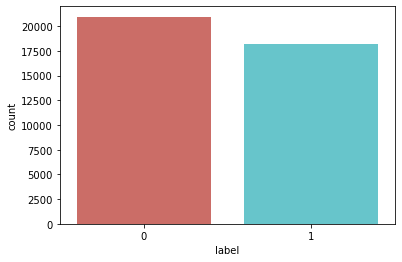

In [39]:
 sns.countplot(x='label', data=df_all, palette='hls')

Depreesive and random (Non-depressive) tweets are almost evenly distributed.

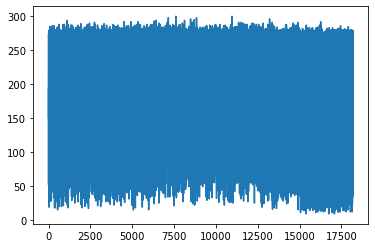

In [40]:
dep_line_lengths = [len(statement) for statement in new_dep_df['text']]
plt.plot(dep_line_lengths)
plt.show()

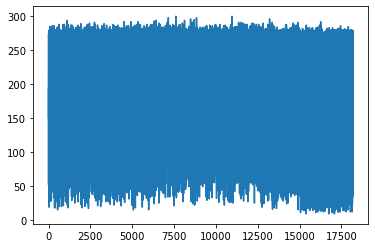

In [41]:

rand_line_lengths = [len(statement) for statement in new_df['text']]
plt.plot(dep_line_lengths)
plt.show()

From the distributions above, it is clear that there is no outliers in our depressive and random datasets.

## Cleaning combined dataset and save it

In [42]:

tweets_arr = [x for x in df_all['text']]

In [43]:
corpus = tweets_cleaner(tweets_arr)

In [44]:
## Adding clean tweets as a new column
df_all['clean_text'] = corpus

In [46]:
df_all

,text,label,clean_text
0,Open discussion. Between the Transfer Portal a...,1,open discussion transfer portal nil become obs...
1,Plenty of things are changing in my life and t...,1,plenty thing changing life life around one thi...
2,I feel a little hopeless. Anyone else? #hopele...,1,feel little hopeless anyone else
3,"Which is more healthy? Hope, or hopelessness? ...",1,healthy hope hopelessness
4,So someone tell me how do I get over #HOPELESS...,1,someone tell get live world surrounded people ...
...,...,...,...
39137,"@andreaj27 well, cheers. i have a glass of wat...",0,well cheer glass water handy drink cheer
39138,@AndreaJo84 Is that right? You're over in Palm...,0,right palm spring guess see local news still w...
39139,@AndreaKobayashi It's the best cafe in Asakusa...,0,best cafe asakusa tokyo small serf best coffee
39140,@AndreaKoeln heeey! tonight is the night! no s...,0,heeey tonight night sleeping like night loll


In [45]:

# replace field that's entirely space (or empty) with NaN
df_all.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [47]:

df_all[df_all['clean_text'].isnull()]

,text,label,clean_text
67,"You are there for them, but they are not there...",1,NaN
881,Why me? \n\n#depression #depressed #sad #cry #...,1,NaN
1142,that’s IT! i’m #depressed,1,NaN
2037,When your #anxiety has #anxiety 😖,1,NaN
5073,I have #anxiety,1,NaN
...,...,...,...
38624,@amyserrata i can do that,0,NaN
38730,@anaggh,0,NaN
38947,@ancesmulles so. when?,0,NaN
38949,@AnchMorpork ?? ??? ??????? ???????????? &quot...,0,NaN


In [48]:

## Deleting the rows with nan 
df_all.dropna(subset=['clean_text'], inplace=True)

In [50]:

## check for nan
df_all[df_all['clean_text'].isnull()]

,text,label,clean_text


In [51]:
## Save cleaned_dataset
df_all.to_csv('clean_data.csv',
              sep='\t', encoding='utf-8',index=False)
     